<a href="https://colab.research.google.com/github/kwangwonland/kfq_ML_2023/blob/main/0713_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
x=tf.ones(shape=(2,1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [ ]:
x=tf.random.normal(shape=(6,1),mean=0,stddev=0.1)
print(x)

tf.Tensor(
[[ 0.08335271]
 [ 0.09554545]
 [-0.08496104]
 [-0.06615457]
 [-0.0785185 ]
 [ 0.14719673]], shape=(6, 1), dtype=float32)


In [ ]:
x=tf.random.uniform(shape=(6,1),minval=0,maxval=6)
print(x)

tf.Tensor(
[[2.5939178]
 [5.7135096]
 [4.6035852]
 [0.6041436]
 [1.1013515]
 [5.9179187]], shape=(6, 1), dtype=float32)


In [ ]:
v=tf.Variable(initial_value=3)
print(v)

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=3>


In [ ]:
v.assign(7)
print(v)

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=7>


In [ ]:
v.assign_add(8)
print(v)

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=15>


In [ ]:
x=tf.square(v)
print(x)

tf.Tensor(225, shape=(), dtype=int32)


In [ ]:
iv=tf.Variable(initial_value=3.0)

In [ ]:
with tf.GradientTape() as tape:
    result=tf.square(iv)
    gradient=tape.gradient(result,iv)
    print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


In [ ]:
time=tf.Variable(9.)

In [ ]:
with tf.GradientTape() as out_tape:
    with tf.GradientTape() as in_tape:
        position=4.9*time**2
    speed=in_tape.gradient(position,time)
acceleration=out_tape.gradient(speed,time)

In [ ]:
print(position,speed,acceleration)

tf.Tensor(396.9, shape=(), dtype=float32) tf.Tensor(88.200005, shape=(), dtype=float32) tf.Tensor(9.8, shape=(), dtype=float32)


# 텐서 플로우 내부 - 선형 분류기

In [ ]:
import numpy as np

In [ ]:
num_samples_per_class=1000

In [ ]:

negative_samples=np.random.multivariate_normal(
    mean=[0,2],
    cov=[[1,0.5],[0.5,1]],
    size=num_samples_per_class
)

print(negative_samples)

[[-0.02934726  2.89305573]
 [ 0.16731555  2.52901938]
 [-0.72344947  1.04488257]
 ...
 [-0.28089606  2.61100084]
 [ 0.92704805  3.60960775]
 [-0.69505707  2.0268798 ]]


In [ ]:

positive_samples=np.random.multivariate_normal(
    mean=[3,0],
    cov=[[1,0.5],[0.5,1]],
    size=num_samples_per_class
)

print(positive_samples)

[[ 1.90501829 -0.07210934]
 [ 4.59725843  0.80227144]
 [ 2.91008032 -0.46553547]
 ...
 [ 3.13396831 -1.30602907]
 [ 2.65199844 -1.55784117]
 [ 3.53270373 -0.15518344]]


In [ ]:
inputs=np.vstack((negative_samples,positive_samples))
print(inputs)

[[-0.02934726  2.89305573]
 [ 0.16731555  2.52901938]
 [-0.72344947  1.04488257]
 ...
 [ 3.13396831 -1.30602907]
 [ 2.65199844 -1.55784117]
 [ 3.53270373 -0.15518344]]


In [ ]:
a=np.array([[1,2],[3,4]])
b=np.array([[5,6],[7,8]])
c=np.vstack((a,b))
print(c)

[[1 2]
 [3 4]
 [5 6]
 [7 8]]


In [ ]:
neg_targets=np.zeros((num_samples_per_class,1),dtype='float32')
pos_targets=np.ones((num_samples_per_class,1),dtype='float32')
targets=np.vstack((neg_targets,pos_targets))

In [ ]:
targets.shape

(2000, 1)

In [ ]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

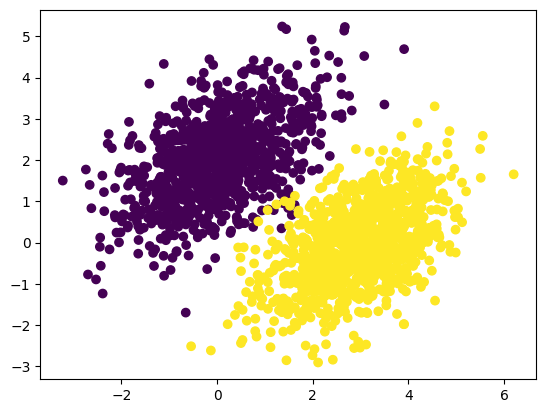

In [ ]:
plt.scatter(inputs[:,0],inputs[:,1],c=targets)
plt.show

In [ ]:
input_dim=2
output_dim=1
W = tf.Variable(initial_value = tf.random.uniform(shape=(input_dim,output_dim)))
b = tf.Variable(initial_value = tf.zeros(shape=(output_dim,)))

In [ ]:
inputs.shape,targets.shape

((2000, 2), (2000, 1))

In [ ]:
def model(inputs):
    return tf.matmul(inputs,W)+b

In [ ]:
def square_loss(targets,predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [ ]:
learing_rate = 0.1
def traing_step(inputs,targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets,predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss,[W,b])
    W.assign_sub(grad_loss_wrt_W*learing_rate)
    b.assign_sub(grad_loss_wrt_b*learing_rate)
    return loss


In [ ]:
inputs=inputs.astype('float32')
targets=targets.astype('float32')

In [ ]:
for step in range(40):
    loss = traing_step(inputs, targets)
    print(f'{step}번째 손실:{loss:.4f}')


0번째 손실:0.4924
1번째 손실:0.1445
2번째 손실:0.1057
3번째 손실:0.0943
4번째 손실:0.0868
5번째 손실:0.0805
6번째 손실:0.0749
7번째 손실:0.0701
8번째 손실:0.0658
9번째 손실:0.0621
10번째 손실:0.0587
11번째 손실:0.0558
12번째 손실:0.0532
13번째 손실:0.0510
14번째 손실:0.0490
15번째 손실:0.0472
16번째 손실:0.0457
17번째 손실:0.0443
18번째 손실:0.0431
19번째 손실:0.0420
20번째 손실:0.0411
21번째 손실:0.0403
22번째 손실:0.0396
23번째 손실:0.0389
24번째 손실:0.0384
25번째 손실:0.0379
26번째 손실:0.0374
27번째 손실:0.0371
28번째 손실:0.0367
29번째 손실:0.0364
30번째 손실:0.0362
31번째 손실:0.0359
32번째 손실:0.0357
33번째 손실:0.0355
34번째 손실:0.0354
35번째 손실:0.0352
36번째 손실:0.0351
37번째 손실:0.0350
38번째 손실:0.0349
39번째 손실:0.0348


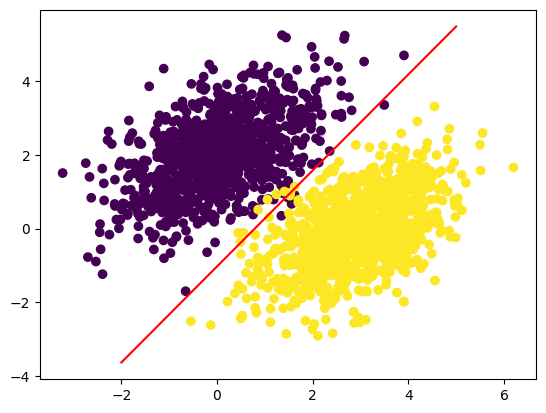

In [ ]:
x1=np.linspace(-2,5,100)
x2=-W[0]/W[1]*x1+(0.5-b)/W[1]
plt.plot(x1,x2,'-r')
plt.scatter(inputs[:,0],inputs[:,1],c=targets[:,0])
plt.show()

# 내부-Layer

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
class SimpleDense(keras.layers.Layer):
    def __init__(self,units,activation=None):
        super().__init__()
        self.units = units
        self.activation = activation
    def build(self,input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim,self.units),
                                initializer='random_normal')
        self.b = self.add_weight(shape=(self.units,),
                                initializer='zeros')
    def call(self,inputs):
        y = tf.matmul(inputs,self.W)+self.b
        if self.activation is not None:
            y = self.activation(y)
        return y


In [ ]:
W[-1]

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([-0.14646319], dtype=float32)>

In [ ]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2,784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)


(2, 32)


In [ ]:
model = keras.Sequential([SimpleDense(32,activation='relu'),
                        SimpleDense(64,activation='relu'),
                        SimpleDense(32,activation='relu'),
                        SimpleDense(10,activation='softmax')])

In [ ]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer='adam',
             loss='mse',metrics=['accuracy'])


In [ ]:
model=keras.Sequential()
model.add(SimpleDense(1))
model.compile(loss='mse')

In [ ]:
model=keras.Sequential()
model.add(SimpleDense(1))
mse_fun=keras.losses.MeanSquaredError
opt_fun=keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss=mse_fun,optimizer=opt_fun,metrics=['accuracy'])

In [ ]:
ip=np.random.permutation(len(inputs))

In [ ]:
s_inputs=inputs[ip]
s_targets=targets[ip]

In [ ]:
n=len(targets)

In [ ]:
train_inputs=s_inputs[:int(n*7/10)]
val_inputs=s_inputs[int(n*7/10):int(n*8/10)]
test_inputs=s_inputs[:int(n*8/10)]

train_targets=s_targets[:int(n*(7/10))]
val_targets=s_targets[int(n*7/10):int(n*8/10)]
test_targets=s_targets[:int(n*8/10)]

In [ ]:
int(8/10)

0